In [1]:
from glob import glob
import json
experiments = glob("exstracs/*")

In [4]:
import pandas as pd
import os
dataTracking = []
rules = []
experiments_list = []
for index, value in enumerate(experiments):
    dataTracking.append(pd.read_csv(os.path.join(value, "iteration_results.csv")))
    rules.append(pd.read_csv(os.path.join(value, "compacted_rules.csv")))
    experiments_list.append(json.load(open(os.path.join(value, "results_data_plot.json"))))

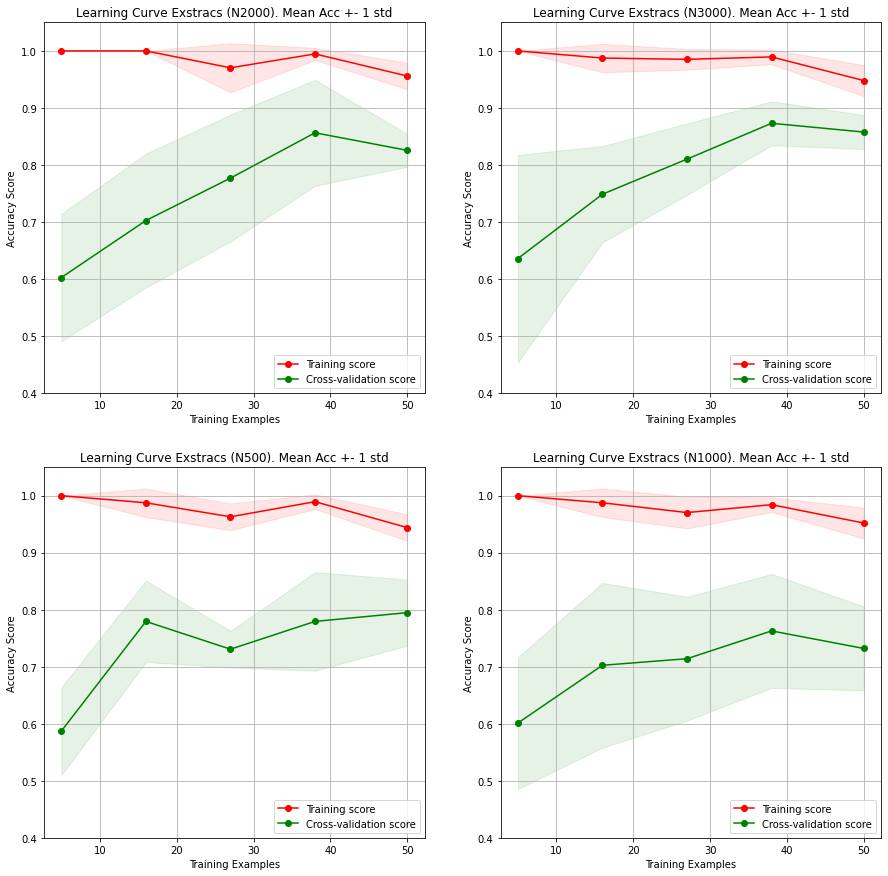

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax = ax.flatten()
for index, dict_expe in enumerate(experiments_list):
    train_scores_mean = np.mean(dict_expe["train_scores"], axis=1)
    test_scores_mean = np.mean(dict_expe["test_scores"], axis=1)
    train_scores_std = np.std(dict_expe["train_scores"], axis=1)
    test_scores_std = np.std(dict_expe["test_scores"], axis=1)
    train_sizes = dict_expe["train_sizes"]
    ax[index].plot(train_sizes, train_scores_mean, 'o-', color="r",
                    label="Training score")
    ax[index].plot(train_sizes, test_scores_mean, 'o-', color="g",
                    label="Cross-validation score")
    ax[index].fill_between(train_sizes, train_scores_mean - train_scores_std,
                            train_scores_mean + train_scores_std, alpha=0.1,
                            color="r")
    ax[index].fill_between(train_sizes, test_scores_mean - test_scores_std,
                            test_scores_mean + test_scores_std, alpha=0.1,
                            color="g")
    ax[index].set_ylim(0.4,1.05)
    ax[index].set_title("Learning Curve Exstracs ("+dict_expe["name"]+"). Mean Acc +- 1 std")
    ax[index].set_xlabel("Training Examples")
    ax[index].set_ylabel("Accuracy Score")
    ax[index].legend(loc="lower right")
    ax[index].grid()
    #plt.show()


In [25]:
def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

def plot_metrics_exstracs(dataTracking, experiments_list, rules):
    iterations = dataTracking["Iteration"].values
    accuracy = dataTracking['Accuracy (approx)'].values
    generality = dataTracking['Average Population Generality'].values
    macroPop = dataTracking["Macropopulation Size"].values
    microPop = dataTracking["Micropopulation Size"].values
    mSize = dataTracking["Match Set Size"].values
    cSize = dataTracking["Correct Set Size"].values
    experience = dataTracking["Average Iteration Age of Correct Set Classifiers"].values
    subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
    crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
    mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
    covering = dataTracking["# Covering Operations Performed in Iteration"].values
    deletion = dataTracking["# Deletion Operations Performed in Iteration"].values
    rc = dataTracking["# Rules Removed via Rule Compaction"].values

    gTime = dataTracking["Total Global Time"].values
    mTime = dataTracking["Total Matching Time"].values
    covTime = dataTracking["Total Covering Time"].values
    crossTime = dataTracking["Total Crossover Time"].values
    covTime = dataTracking["Total Covering Time"].values
    mutTime = dataTracking["Total Mutation Time"].values
    atTime = dataTracking["Total Attribute Tracking Time"].values
    initTime = dataTracking["Total Model Initialization Time"].values
    rcTime = dataTracking["Total Rule Compaction Time"].values
    delTime = dataTracking["Total Deletion Time"].values
    subTime = dataTracking["Total Subsumption Time"].values
    selTime = dataTracking["Total Selection Time"].values
    evalTime = dataTracking["Total Evaluation Time"].values

    fig, ax = plt.subplots(2, 3, figsize=(20,10))
    ax[0,0].plot(iterations,accuracy,label="approx accuracy")
    ax[0,0].plot(iterations,generality,label="avg generality")
    ax[0,0].set_xlabel('Iteration')
    ax[0,0].set_ylabel('accuracy/generality')
    #ax[0,0].set_ylim(0.75, 1.01)
    ax[0,0].legend(loc="best")

    ax[0,1].plot(iterations,macroPop,label="macroPop Size")
    ax[0,1].plot(iterations,microPop,label="microPop Size")
    ax[0,1].set_xlabel('Iteration')
    ax[0,1].set_ylabel('Macro/MicroPop Size')
    ax[0,1].legend(loc="best")

    ax[0,2].plot(iterations,mSize,label="[M] size")
    ax[0,2].plot(iterations,cSize,label="[C] size")
    ax[0,2].plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
    ax[0,2].plot(iterations,movingAvg(cSize),label="[C] size movingAvg")
    ax[0,2].set_xlabel('Iteration')
    ax[0,2].set_ylabel('[M]/[C] size per iteration')
    ax[0,2].legend(loc="best")

    ax[1,0].scatter(iterations,experience, s=1, linewidths=0, marker=",")
    ax[1,0].set_xlabel('Iteration')
    ax[1,0].set_ylabel('Average [C] Classifier Age')
    ax[1,0].legend(loc="best")

    ax[1,1].plot(iterations,np.cumsum(subsumption),label="Subsumption Count")
    ax[1,1].plot(iterations,np.cumsum(crossover),label="Crossover Count")
    ax[1,1].plot(iterations,np.cumsum(mutation),label="Mutation Count")
    ax[1,1].plot(iterations,np.cumsum(deletion),label="Deletion Count")
    ax[1,1].plot(iterations,np.cumsum(covering),label="Covering Count")
    ax[1,1].plot(iterations,np.cumsum(rc),label="RC Count")
    ax[1,1].set_xlabel('Iteration')
    ax[1,1].set_ylabel('Cumulative Operations Count Over Iterations')
    ax[1,1].legend(loc="best")


    ax[1,2].plot(iterations,initTime,label="Init Time")
    ax[1,2].plot(iterations,mTime+initTime,label="Matching Time")
    ax[1,2].plot(iterations,covTime+mTime+initTime,label="Covering Time")
    ax[1,2].plot(iterations,selTime+covTime+mTime+initTime,label="Selection Time")
    ax[1,2].plot(iterations,crossTime+selTime+covTime+mTime+initTime,label="Crossover Time")
    ax[1,2].plot(iterations,mutTime+crossTime+selTime+covTime+mTime+initTime,label="Mutation Time")
    ax[1,2].plot(iterations,subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="Subsumption Time")
    ax[1,2].plot(iterations,atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="AT Time")
    ax[1,2].plot(iterations,delTime+atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="Deletion Time")
    ax[1,2].plot(iterations,rcTime+delTime+atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="RC Time")
    ax[1,2].plot(iterations,evalTime+rcTime+delTime+atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="Evaluation Time")
    ax[1,2].plot(iterations,gTime,label="Total Time")
    ax[1,2].set_xlabel('Iteration')
    ax[1,2].set_ylabel('Cumulative Time (Stacked)')
    ax[1,2].legend(loc="best")
    title = "Learning Iterations Metrics for N="+experiments_list["name"]+"\n Total number of rules: " + str(len(rules)) \
        + "\n Final Training Accuracy: " + "{:.2f}".format(float(experiments_list["final_training_acc"]))
    fig.suptitle(title, verticalalignment="center", fontsize="x-large", fontweight="bold")
    return fig, ax

No handles with labels found to put in legend.


(<Figure size 1440x720 with 6 Axes>,
 array([[<AxesSubplot:xlabel='Iteration', ylabel='accuracy/generality'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Macro/MicroPop Size'>,
         <AxesSubplot:xlabel='Iteration', ylabel='[M]/[C] size per iteration'>],
        [<AxesSubplot:xlabel='Iteration', ylabel='Average [C] Classifier Age'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Cumulative Operations Count Over Iterations'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Cumulative Time (Stacked)'>]],
       dtype=object))

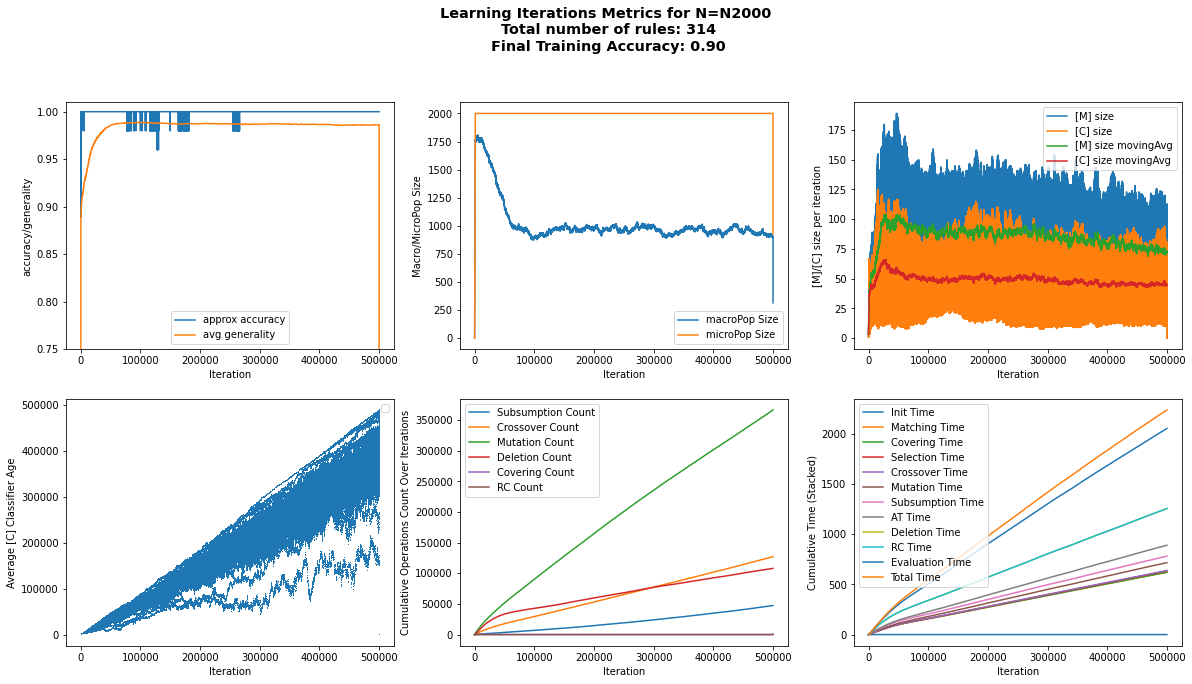

In [26]:
plot_metrics_exstracs(dataTracking[0], experiments_list[0], rules[0])

No handles with labels found to put in legend.


(<Figure size 1440x720 with 6 Axes>,
 array([[<AxesSubplot:xlabel='Iteration', ylabel='accuracy/generality'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Macro/MicroPop Size'>,
         <AxesSubplot:xlabel='Iteration', ylabel='[M]/[C] size per iteration'>],
        [<AxesSubplot:xlabel='Iteration', ylabel='Average [C] Classifier Age'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Cumulative Operations Count Over Iterations'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Cumulative Time (Stacked)'>]],
       dtype=object))

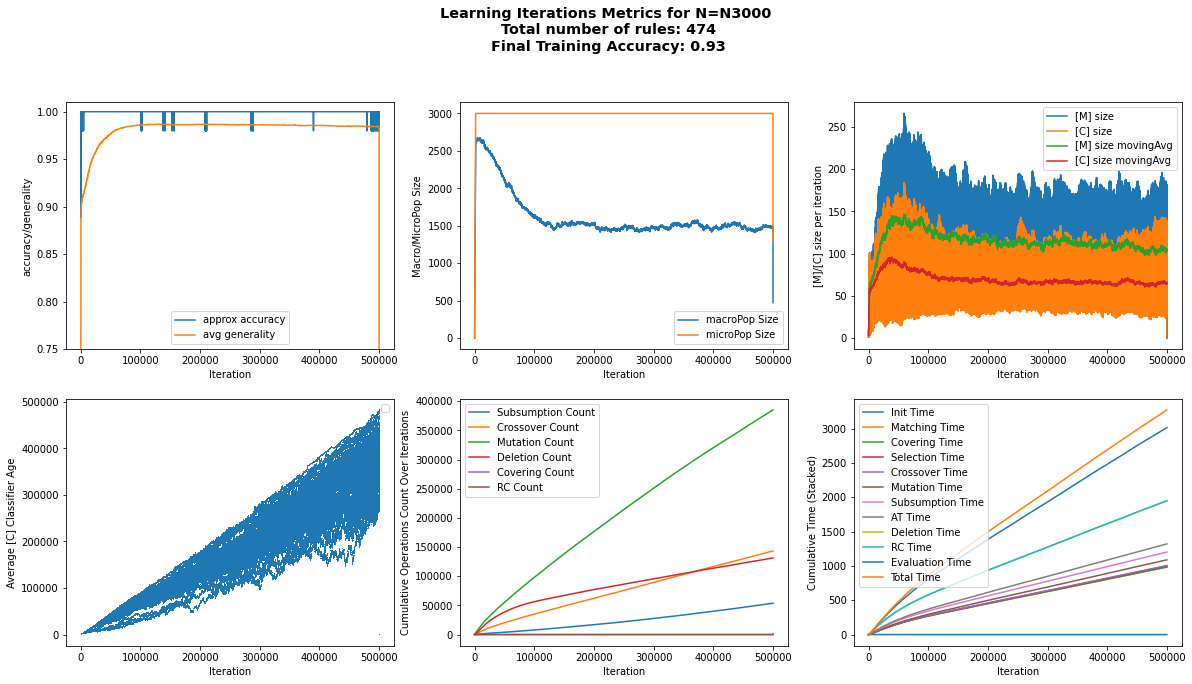

In [27]:
plot_metrics_exstracs(dataTracking[1], experiments_list[1], rules[1])

No handles with labels found to put in legend.


(<Figure size 1440x720 with 6 Axes>,
 array([[<AxesSubplot:xlabel='Iteration', ylabel='accuracy/generality'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Macro/MicroPop Size'>,
         <AxesSubplot:xlabel='Iteration', ylabel='[M]/[C] size per iteration'>],
        [<AxesSubplot:xlabel='Iteration', ylabel='Average [C] Classifier Age'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Cumulative Operations Count Over Iterations'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Cumulative Time (Stacked)'>]],
       dtype=object))

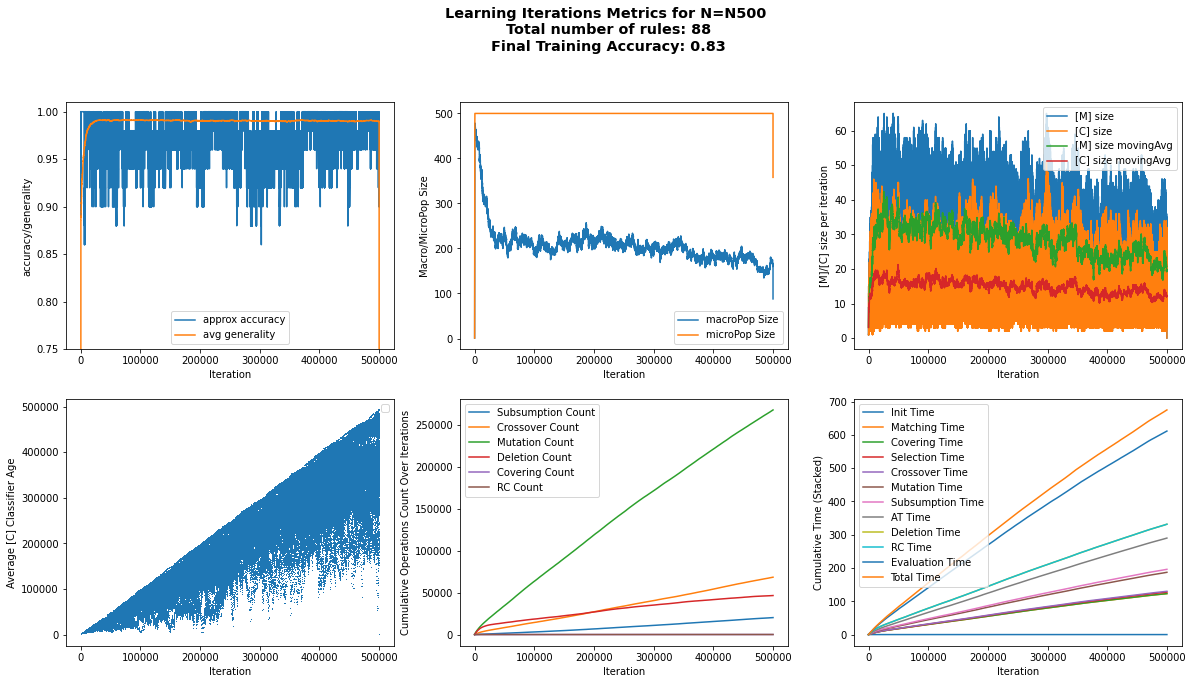

In [28]:
plot_metrics_exstracs(dataTracking[2], experiments_list[2], rules[2])

No handles with labels found to put in legend.


(<Figure size 1440x720 with 6 Axes>,
 array([[<AxesSubplot:xlabel='Iteration', ylabel='accuracy/generality'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Macro/MicroPop Size'>,
         <AxesSubplot:xlabel='Iteration', ylabel='[M]/[C] size per iteration'>],
        [<AxesSubplot:xlabel='Iteration', ylabel='Average [C] Classifier Age'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Cumulative Operations Count Over Iterations'>,
         <AxesSubplot:xlabel='Iteration', ylabel='Cumulative Time (Stacked)'>]],
       dtype=object))

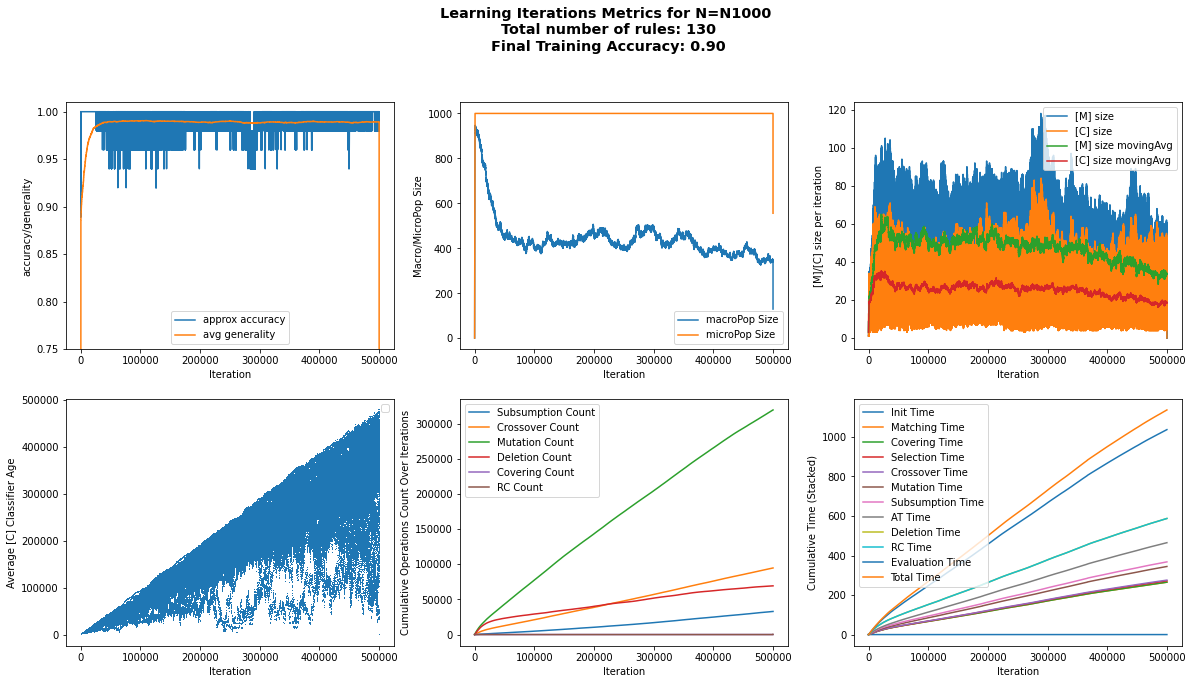

In [29]:
plot_metrics_exstracs(dataTracking[3], experiments_list[3], rules[3])